<a href="https://colab.research.google.com/github/aishwaryaishu009/Ricedataset/blob/main/Ricedataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RICE Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.listdir('/content/drive/MyDrive/Rice_Image_Dataset')


['train', 'test']

In [ ]:
path = '/content/drive/MyDrive/Rice_Image_Dataset'


In [ ]:
import numpy as np
path = ('/content/drive/MyDrive/Rice_Image_Dataset')
def l_images(path):
  imgs,labels=[],[]
  l1=os.listdir(path)
  for ele in l1:
    l2=os.listdir(path + '/' + ele)
    for j in l2:
      img=Image.open(path+ ele + '/' +j)
      img.resize(size=(28,28))
      img=img.convert('L')
      imgs.append(np.array(img).flatten())
      labels.append(ele)
      del img
  return np.array(imgs),labels


In [ ]:
import PIL
import os
from PIL import Image

x,y= l_images('/content/drive/MyDrive/Rice_Image_Dataset/train/')


In [ ]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,shuffle=True)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
model1=Sequential()
model1.add(Dense(64,input_dim=xtrain.shape[1],activation='relu'))
model1.add(Dense(128,activation='relu'))
# model1.add(Dropout(0.1))
model1.add(Dense(5,activation='softmax'))
model1.add(Dropout(0.1))
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model1.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model1.add(Dense(256, activation='relu'))


In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                4000064   
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
 dropout (Dropout)           (None, 5)                 0         
                                                                 
Total params: 4009029 (15.29 MB)
Trainable params: 4009029 (15.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#from tensorflow.keras.models import Model

model1.fit(xtrain,ytrain,epochs=50)

Epoch 1/50
6/6 [==============================] - 1s 52ms/step - loss: 11.6923 - accuracy: 0.2057
Epoch 2/50
6/6 [==============================] - 0s 50ms/step - loss: 11.4943 - accuracy: 0.2114
Epoch 3/50
6/6 [==============================] - 0s 52ms/step - loss: 10.8494 - accuracy: 0.2114
Epoch 4/50
6/6 [==============================] - 0s 49ms/step - loss: 11.0244 - accuracy: 0.2114
Epoch 5/50
6/6 [==============================] - 0s 53ms/step - loss: 11.9733 - accuracy: 0.2114
Epoch 6/50
6/6 [==============================] - 0s 48ms/step - loss: 11.7338 - accuracy: 0.2114
Epoch 7/50
6/6 [==============================] - 0s 47ms/step - loss: 11.9088 - accuracy: 0.2114
Epoch 8/50
6/6 [==============================] - 0s 51ms/step - loss: 11.4022 - accuracy: 0.2114
Epoch 9/50
6/6 [==============================] - 0s 50ms/step - loss: 11.4206 - accuracy: 0.2114
Epoch 10/50
6/6 [==============================] - 0s 55ms/step - loss: 11.2363 - accuracy: 0.2114
Epoch 11/50
6/6 [==

3/3 [==============================] - 0s 13ms/step


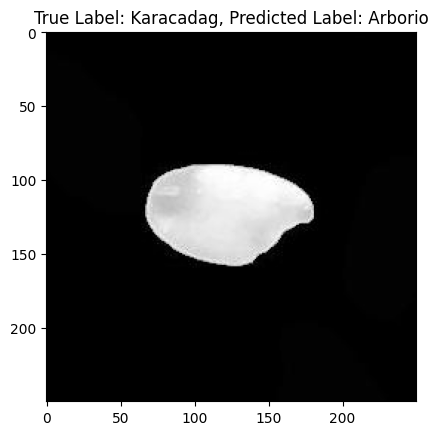

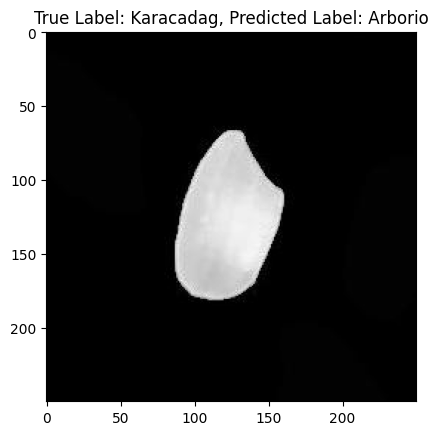

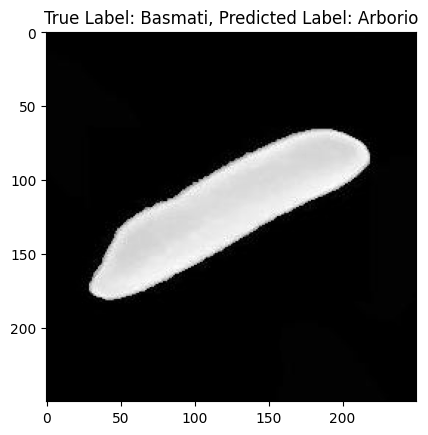

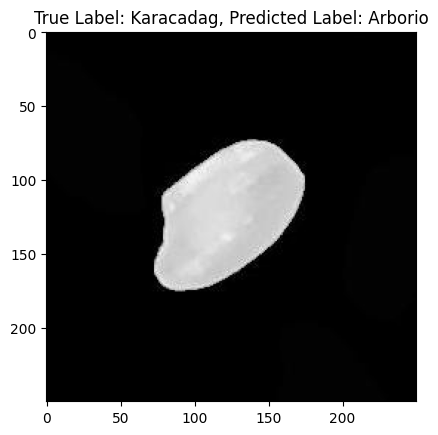

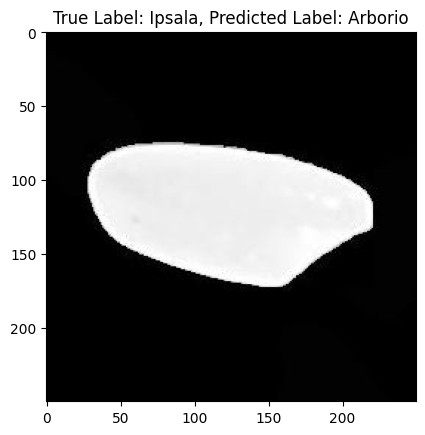

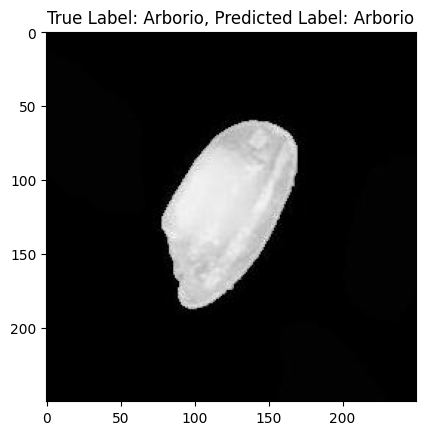

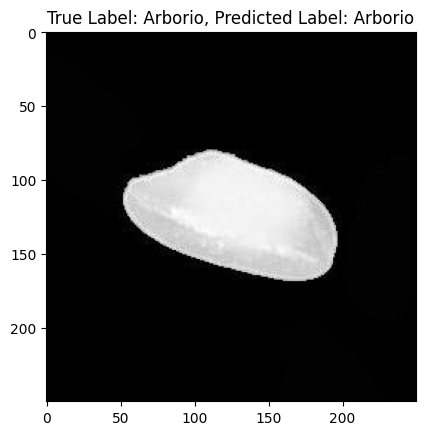

In [ ]:
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model1.predict(xtest)

# Map predicted labels back to original class names
predicted_labels = le.inverse_transform(np.argmax(predictions, axis=1))

# Display a few images with their true and predicted labels
num_display = 7  # Adjust this number based on how many images you want to display
indices_to_display = np.random.choice(len(xtest), num_display, replace=False)

for i in indices_to_display:
    original_label = le.inverse_transform([ytest[i]])[0]
    predicted_label = predicted_labels[i]

    # Reshape the flattened image to its original shape (assuming it was flattened in the function l_images)
    original_image = xtest[i].reshape(250, 250)

    plt.imshow(original_image, cmap='gray')
    plt.title(f'True Label: {original_label}, Predicted Label: {predicted_label}')
    plt.show()


***ImageDataGenerator***


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

# Assuming you have a generator for both training and validation data
train_data_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = ImageDataGenerator(rescale=1./255)

# Specify the directories containing your training and validation data
train_dir = "/content/drive/MyDrive/Rice_Image_Dataset/train"
val_dir = "/content/drive/MyDrive/Rice_Image_Dataset/test"

# Create generators
train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # or 'categorical' if you have multiple classes
)

val_generator = val_data_gen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # or 'categorical' if you have multiple classes
)


Found 250 images belonging to 5 classes.
Found 150 images belonging to 5 classes.


In [ ]:
!pip install -U keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.2 which is incompatible.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.layers import Dropout

# Define a simple convolutional neural network (CNN) model
model = Sequential()
model.add(Input(shape=(150, 150, 3)))  # Use Input(shape) as the first layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))  # Adjust the number based on your number of classes
model1.add(Dropout(0.1))
model1.add(Dropout(0.1))
model1.add(Dropout(0.1))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained the model and stored the history
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/50
7/7 [==============================] - 18s 2s/step - loss: 1.5791 - accuracy: 0.3761 - val_loss: 1.1499 - val_accuracy: 0.6172
Epoch 2/50
7/7 [==============================] - 16s 2s/step - loss: 0.6666 - accuracy: 0.7857 - val_loss: 0.3962 - val_accuracy: 0.7969
Epoch 3/50
7/7 [==============================] - 16s 2s/step - loss: 0.3161 - accuracy: 0.8670 - val_loss: 0.3306 - val_accuracy: 0.8906
Epoch 4/50
7/7 [==============================] - 14s 2s/step - loss: 0.1003 - accuracy: 0.9587 - val_loss: 0.2574 - val_accuracy: 0.9219
Epoch 5/50
7/7 [==============================] - 15s 2s/step - loss: 0.0502 - accuracy: 0.9908 - val_loss: 0.2285 - val_accuracy: 0.9219
Epoch 6/50
7/7 [==============================] - 16s 2s/step - loss: 0.1008 - accuracy: 0.9495 - val_loss: 0.1693 - val_accuracy: 0.9141
Epoch 7/50
7/7 [==============================] - 16s 2s/step - loss: 0.1008 - accuracy: 0.9541 - val_loss: 0.2833 - val_accuracy: 0.8984
Epoch 8/50
7/7 [==================

KeyboardInterrupt: ignored

3/3 [==============================] - 0s 15ms/step


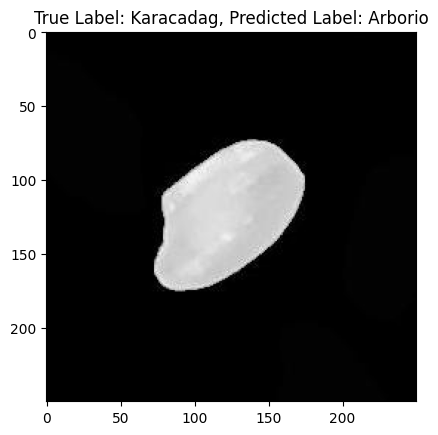

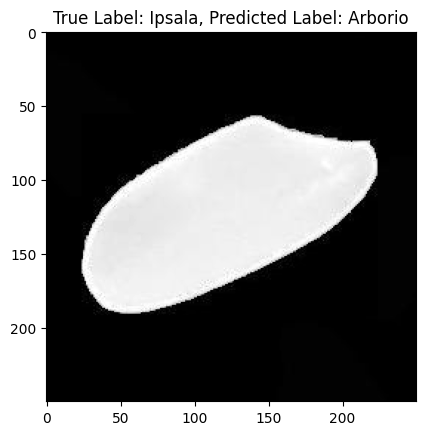

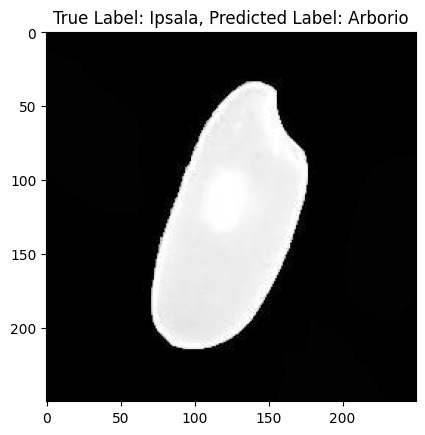

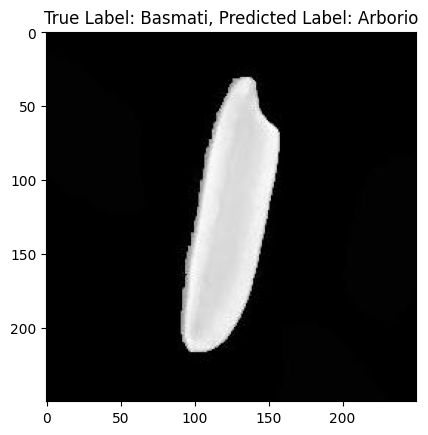

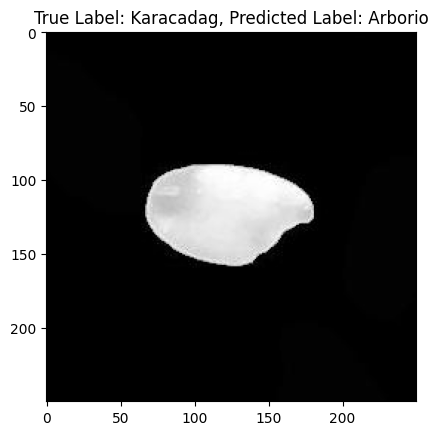

In [ ]:
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model1.predict(xtest)

# Map predicted labels back to original class names
predicted_labels = le.inverse_transform(np.argmax(predictions, axis=1))

# Display a few images with their true and predicted labels
num_display = 5  # Adjust this number based on how many images you want to display
indices_to_display = np.random.choice(len(xtest), num_display, replace=False)

for i in indices_to_display:
    original_label = le.inverse_transform([ytest[i]])[0]
    predicted_label = predicted_labels[i]

    # Reshape the flattened image to its original shape (assuming it was flattened in the function l_images)
    original_image = xtest[i].reshape(250,250)

    plt.imshow(original_image, cmap='gray')
    plt.title(f'True Label: {original_label}, Predicted Label: {predicted_label}')
    plt.show()